### Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


## Test P1 (2025/1): time and frequency domain analysis of sdof systems

---


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt

from MRPy import *


## Descrição do problema

O pórtico apresentado na figura tem duas colunas flexíveis com massa desprezável
e rigidez horizontal $k = 12EI/L^3$ cada. 
A viga tem rigidez infinita e massa $M = 1000$kg. 
A altura das colunas é $L = 3$m e sua rigidez à flexão, $EI$, é tal que a 
frequência natural de vibração livre do pórtico resulta ser $f_{\rm n} = 10$Hz. 
Sobre a viga está instalado um motor que, por falta de manutenção, resultou desbalanceado. 
A massa do motor já está incluída na massa da viga, $M$. 
O desbalanceamento do motor pode ser descrito como uma massa excêntrica $m = 50$kg, 
girando com frequência $f_0 = 480$ r.p.m (rotações por minuto) e excentricidade $r = 5$mm. 
A componente vertical da força centrípeta não é de interesse, 
sendo que o pórtico é dinamicamente carregado apenas na horizontal. 
O amortecimento viscoso equivalente para o pórtico é $\zeta = 1$%. 

<img src="resources/tests/PEC00025A_251_P1.png" alt="PEC00025A_251_P1" width="540px"/>

## Questão 1

Calcule as amplitudes das respostas em deslocamento, $u(t)$, velocidade, $v(t)$, 
e aceleração, $a(t)$, com a excitação considerada estacionária. 
Apresente a força estática equivalente para fins de verificação do 
dimensionamento da coluna. (_vibração forçada, domínio da frequência_)

### _Resolução_

Vamos inicialmente criar as variáveis com os parâmetros dados e calcular as
demais propriedades necessárias.


In [16]:
L  =  3.                # altura da coluna (m)
M  =  1000.             # massa da viga + motor (kg)
zt =  0.01              # amortecimento razão do crítico
fn =  10.               # frequência fundamental do pórtico (Hz)
wn =  2*np.pi*fn        # frequência fundamental em rad/s
Tn =  1/fn              # período de vibração (s)

K  =  M*wn*wn           # rigidez das duas colunas somadas k+k (N/m)
EI =  K*(L**3)/12.      # rigidez à flexão equivalente das duas colunas

m  =  50.               # massa excêntrica
r  =  0.005             # excentricidade (m)
f0 =  480./60.          # frequência do motor (Hz)
w0 =  2*np.pi*f0        # velocidade angular do motor (rad/s)

F0 =  m*w0*w0*r         # amplitude da força centrípeta (N)

print('Rigidez das duas colunas .......  K = {0:5.0f} kN/m'.format(K/1000))
print('Rigidez à flexão equivalente ... EI = {0:5.0f} kNm2'.format(EI/1000))
print('Amplitude da excitação ......... F0 = {0:5.0f} N   '.format(F0))
print('Frequência da excitação ........ f0 = {0:5.1f} Hz\n'.format(f0))


Rigidez das duas colunas .......  k =  3948 kN/m
Rigidez à flexão equivalente ... EI =  8883 kNm2
Amplitude da excitação ......... F0 =   632 N   
Frequência da excitação ........ f0 =   8.0 Hz



Para se calcular a resposta dinâmica à uma carga harmônica estacionária, basta
calcular a função de amplificação dinâmica na frequência da excitação: 

$$ A(\beta, \zeta) = \sqrt{ \frac{1}{(1 - \beta^2)^2 + (2\zeta\beta)^2} }$$

com $\beta = w_0 \, / \, w_{\rm n} = f_0 \, / \, f_{\rm n}$. 
A função de amplificação multiplica a resposta estática à amplitude da carga:

$$ u_{\rm d} = A(\beta, \zeta) \; u_{\rm e} = A(\beta, \zeta) \; \frac{F_0}{k} $$


In [15]:
Adyn = lambda f, zt: np.sqrt(1/( (1 - (f/fn)**2)**2 + (2*zt*(f/fn))**2 ))

A_f0 = Adyn(f0, zt)
ue   = F0/k
ud   = A_f0*ue

print('Fator de amplificação dinâmica .......  A = {0:5.2f}     '.format(A_f0))
print('Deslocamento estático (referência) ... ue = {0:5.2f} mm  '.format(1000*ue))
print('Amplitude do deslocamento dinâmico ... ud = {0:5.2f} mm\n'.format(1000*ud))


Fator de amplificação dinâmica .......  A =  2.78     
Deslocamento estático (referência) ... ue =  0.16 mm  
Amplitude do deslocamento dinâmico ... ud =  0.44 mm



## Questão 2

Apresente a resposta em deslocamento no tempo, $u(t)$, que ocorre após a parada suave do motor. 
Quanto tempo leva até a amplitude do deslocamento cair à metade do valor inicial? 
(_vibração livre, domínio do tempo_)

### _Resolução_

Como não é especificado o instante em que o motor é desligado, vamos admitir que a partir
do desligamento as condições iniciais são $u_0 = u_d$ e $v_0 = 0$.
Invertendo-se a fórmula do envelope de amplitude amortecida pode-se isolar o tempo, $T$, necessário
para que a amplitude caia a um dado nível.

$$ u_2/u_1  = \exp{(-\zeta \omega_{\rm n} T)} $$

Para cair à metade da amplitude inicial faz-se:
 
$$ T  = \frac{1}{-\zeta \omega_{\rm n}} \ln \left( \frac{u_{\rm d} /2}{u_{\rm d}} \right)$$


In [19]:
T =  np.log(1/2) / (-zt*wn)        # o pico ocorre após 1/4 do período

print('Tempo para a amplitude decair à metade ... T = {0:5.1f} s\n'.format(T))


Tempo para a amplitude decair à metade ... T =   1.1 s



Abaixo é feito o gráfico do deslocamento em vibração livre a partir das condições iniciais.
O gráfico confirma visualmente o resultado obtido.


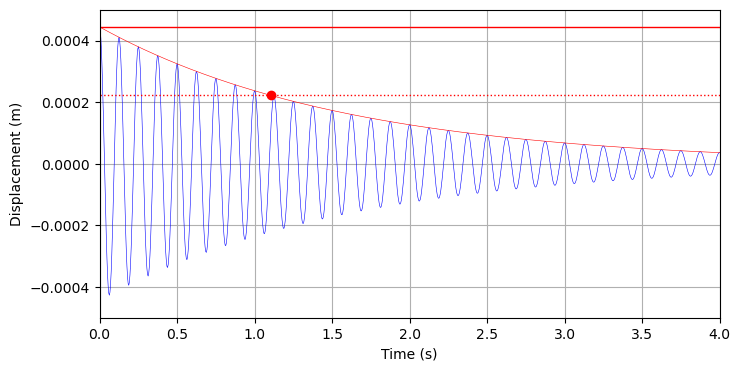

In [36]:
t  = np.linspace(0, 4, 1024)
um = ud*np.exp(-zt*wn*t)
u  = um*np.cos(w0*t)

plt.figure(1, figsize=[8,4], clear=True)

plt.plot(t, u,  'b', lw=0.4)
plt.plot(t, um, 'r', lw=0.4)

plt.plot([0, 4],[ud,   ud  ],'r' , lw=1)
plt.plot([0, 4],[ud/2, ud/2],'r:', lw=1)
plt.plot( T,     ud/2,       'ro'      )

plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.axis([0, 4, -0.0005, 0.0005])
plt.grid(True)


## Questão 3

Considere agora que o motor é instantaneamente travado no instante em que $\omega_0 t = \pi/2$ rad. 
Qual o valor do impulso devido ao travamento do motor? 
Qual a resposta em deslocamento no tempo, $u(t)$? 
_Dica: considere a conservação da quantidade de movimento, sendo que 
a componente horizontal da velocidade da massa excêntrica é $v_x = −\omega_0 r \sin(\omega_0 t)$
e a quantidade de movimento da viga também deve ser considerada. (resposta impulsiva, domínio do tempo)_ 

### _Resolução_




Deslocamento máximo por simulação ......... u_pk  =  0.86 m


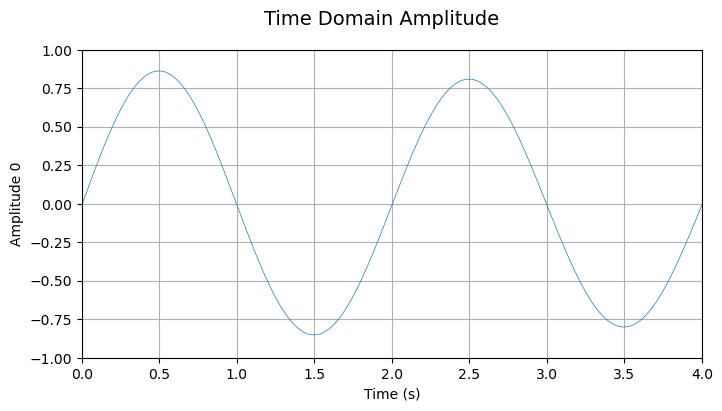

In [4]:
F   =  MRPy.zeros(NX=1, N=4096, fs=1024.)
u1  =  F.sdof_Duhamel(fn, zt, U0=0., V0=V0).zero_mean()
upk =  np.max(u1[0])

print('Deslocamento máximo por simulação ......... u_pk  = {0:5.2f} m'.format(upk))

u1.plot_time(fig=1, figsize=[8,4], axis_t=[0, u1.Td, -1, 1]);


## Questão 4 

Qual a máxima velocidade angular do motor que produz uma resposta em deslocamento 
com mesma amplitude que a resposta estática à carga $F_0$, mas com $\omega_0 > \omega_{\rm n}$ 
(onde $\omega_{\rm n}$ é a frequência natural de vibração livre do pórtico)? 
Qual é essa amplitude?

### _Resolução_



In [5]:
amax = wn*wn*umax

print('Aceleração máxima por derivação ........... a_max = {0:5.2f} m/s2'.format(amax))


Aceleração máxima por derivação ........... a_max =  8.59 m/s2
